### Multple Linear Regression 

Multiple Linear Regression is a statistical method used to model the relationship between two or more predictor variables (independent variables) and a single quantitative response variable (dependent variable). The goal is to find the best-fitting equation that represents how the response variable is affected by multiple predictors. In contrast to simple linear regression, where there is only one predictor, multiple linear regression allows us to account for the influence of several variables simultaneously.

The following code outlines how to do so. 

In [9]:
import pandas as pd 

df = pd.read_csv('/Users/muhammadmuhdhar/Desktop/Repo/ml-algorithms-from-scratch/HousingData.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [111]:
y = df['MEDV'].fillna(0)
X = df.drop('MEDV', axis=1).fillna(0)

The relationship between the predictor ${x}$ and the response variable ${y}$ in simple linear regression is modeled by the following equation:

$\hat{y} = {\beta_0} + {\beta_1}{x}$ 


This equation applies when there is a single predictor variable. However, when dealing with multiple predictor variables, we need to extend the model to account for all the predictors. The general form for multiple linear regression is:

$\hat{y} = {\beta_0} + {\beta_1}{x} + {\beta_2}{x}  +{\beta_3}{x} ... {\beta_n}{x}$

Here, each ${\beta_i}$ represents the coefficient associated with the ${i}$-th predictor. This allows us to model the relationship between multiple input variables and the response ${y}$. 

This can be wrotten in matrix form as:

$\hat{Y} = {X}{\beta}+{\epsilon}$

Where:
- $\hat{Y}$ - The vector of predicted values for the dependent variable
- ${X}$ - Matrix containing predictor variables
- ${\beta}$ - The vector for coeffecients
- ${\epsilon}$ - $n \times 1$ vector of residuals

### Least Squares Method

The *least squares method* is used to to estimate coefficents of a linear regression model. it is based on the principle of minimizing the sum of the squared differences between the observed values and the predicted values. These differences are known as *residuals*. The formula can be broken down into these steps:

$\hat{\beta} = ({X}^{T}{X})^{-1}{X}^{T}{Y}$

Where: 
- ${X}$ -  is a table (or matrix) that holds all the input data.
- ${X}^{T}$ - Transpose of X 
- $({X}^{T}{X})^{-1}$ - The inverse of ${X}$ times ${X}^{T}$ 
- ${X}^{T}{Y}$ - The transpose of X multiplied the Vector of observed Y values



In [112]:
#  X as  matrix

X.columns = range(X.shape[1])
print(X.shape)
X

(506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [118]:
# X transposed

X_transpose = X.T
print(X_transpose.shape)

(13, 506)


In [114]:
#  (X^T * X)^-1

import numpy as np

XtX_inv = np.linalg.inv(X_transpose @ X )

print(XtX_inv.shape)

(13, 13)


In [115]:
# X^T * Y

XtY = X_transpose @ y
XtY

0     2.425553e+04
1     1.615252e+05
2     1.069498e+05
3     9.801000e+02
4     6.094428e+03
5     7.392408e+04
6     6.997789e+05
7     4.571387e+04
8     9.344510e+04
9     4.287798e+06
10    2.053167e+05
11    4.208050e+06
12    1.152214e+05
dtype: float64

In [116]:
# (X^T * X)^-1 * X^T * Y

beta_hat = XtX_inv @ XtY
beta_hat

array([-0.10200011,  0.04656304, -0.04300869,  3.17771588, -3.98392954,
        6.17997125, -0.01766603, -0.9994886 ,  0.15280919, -0.00848455,
       -0.46071769,  0.01464063, -0.31244978])

In [119]:
y_pred = X @ beta_hat 

y_pred

0      28.835630
1      24.154522
2      30.727508
3      29.275999
4      30.996515
         ...    
501    28.144656
502    22.514883
503    28.745500
504    27.111542
505    23.471002
Length: 506, dtype: float64

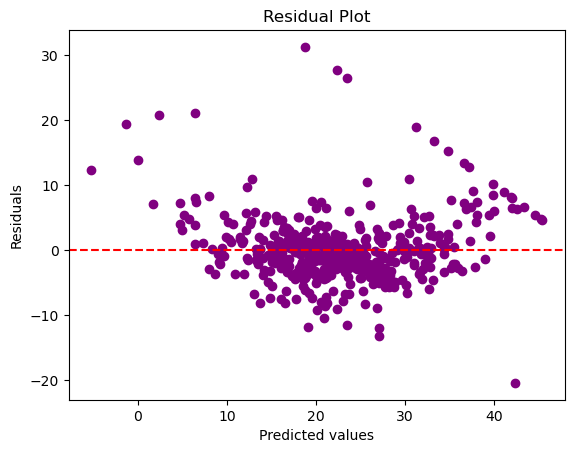

In [120]:
import matplotlib.pyplot as plt

residuals = y - y_pred

plt.scatter(y_pred, residuals, color='purple')  
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
